In [4]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We define clusters as observations that are nearest to eachother (nearest neighbors). What we care about is what is this cluster and what is it's shape?  We might see long elongated cucumber shapes.  It is not an exact science.  When we allocate to the cluster, it changes the dynamics of that group.  Tend to either not converge at all or lead to very unstable results.  We instead do 2 steps - 1. Assign each case to a component 2. M-step - 3. E-step  and repeat.<br>
- Akaike Information Criterion: AIC = 2K - 2log L - minimize it 
<br><br>
- Based on likelihood properties 
<br><br>
- Bayesian Information Criterion BIC = Klog N-2log L
<br><br>
<b><u>Based on Bayesian approximations</b></u>
- K number of parameters
- N number of cases
- logL model log-likelihood 
<br>
Neither criterion works well on small steps <br><br>
<u><b>Types</u></b>
- Clustering k-means, agglomeration<br><br>
- Mixtures EM-algorithm <br><br>
- Categoriztion MLE<br><br>

In [8]:
htwt = pd.read_csv('/Users/jennyskytta/Desktop/htwt.csv', sep="\t")
htwt.sample(1)

,age.at.death,age,alive,male,height,weight
130,2.75,2.75,0,0.0,NaN,NaN


In [52]:
concrete = pd.read_csv('/Users/jennyskytta/Desktop/concrete.csv')\
   .drop("No", axis=1)  # do not care about the case number
concrete.shape

(103, 10)

In [12]:
concrete.sample(4)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
10,145.0,106.0,136.0,208.0,10.0,751.0,883.0,24.5,61.0,26.02
23,146.0,178.0,0.0,192.0,11.0,961.0,749.0,18.0,46.0,17.19
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
37,165.0,150.0,0.0,182.0,12.0,1023.0,729.0,14.5,20.0,18.26


In [13]:
concrete.isna().sum()  # nothing missing so no need to clean the data

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [15]:
# check for unreasonable values 
# do this by creating a dataframe with min middle and max values 
pd.DataFrame({"min":concrete.min(), "mean":concrete.mean(), "max":concrete.max()})

,min,mean,max
Cement,137.00,229.894175,374.00
Slag,0.00,77.973786,193.00
Fly ash,0.00,149.014563,260.00
Water,160.00,197.167961,240.00
SP,4.40,8.539806,19.00
Coarse Aggr.,708.00,883.978641,1049.90
Fine Aggr.,640.60,739.604854,902.00
SLUMP(cm),0.00,18.048544,29.00
FLOW(cm),20.00,49.610680,78.00
Compressive Strength (28-day)(Mpa),17.19,36.039417,58.53


In [17]:
X = concrete[["Cement", "Slag", "Fly ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr."]]
X.shape

(103, 7)

In [19]:
from sklearn.mixture import GaussianMixture
# how do the components look?
#full - every elipse can be a different size and angle 
#tied - every component is elipsed that can be in arbitrary direction but all the same 
#spherical - they are spherical / circles 
#diag - assume they are elipses but slanted but not diagonally 
m = GaussianMixture(2, covariance_type="diag") # this is a multivariate model
_=m.fit(X)
m.bic(X)  # compute BIC  which we will use to compare models using R-squared or RMSE etc

7215.08700169918

In [20]:
# lets do predictions 
m.predict(X)  # worried that we have too few cases for 7 dimensional problem 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [30]:
ks = range(1,6)
for k in ks:
    m = GaussianMixture(k, covariance_type="tied")
    _ = m.fit(X)
    print(f"k={k}, tied BIC={m.bic(X)}")
    m = GaussianMixture(k, covariance_type="diag")
    _ = m.fit(X)
    print(f"k={k}, diagonal BIC={m.bic(X)}")

k=1, tied BIC=6892.920605451509
k=1, diagonal BIC=7374.7126733591285
k=2, tied BIC=6818.06367065574
k=2, diagonal BIC=7215.08700169918
k=3, tied BIC=6847.431931465678
k=3, diagonal BIC=7098.764531319585
k=4, tied BIC=6800.418240742379
k=4, diagonal BIC=6670.545906126845
k=5, tied BIC=6812.086117989182
k=5, diagonal BIC=6720.924370366393


In [29]:
for k in ks:
    m = GaussianMixture(k, covariance_type="spherical")
    _ = m.fit(X)
    print(f"k={k}, spherical BIC={m.bic(X)}")  # numbers are variable 

k=1, spherical BIC=8091.7071840219605
k=2, spherical BIC=7947.674198571552
k=3, spherical BIC=7905.882913222493
k=4, spherical BIC=7816.191044959881
k=5, spherical BIC=7808.860613169443


In [35]:
ks = range(1,15)
bics =[]
for k in ks:
    m = GaussianMixture(k, covariance_type="spherical")
    _ = m.fit(X)
    bics.append(m.bic(X))
    print(f"k={k}, spherical BIC={m.bic(X)}")
sorted(bics)

k=1, spherical BIC=8091.7071840219605
k=2, spherical BIC=7947.674198571552
k=3, spherical BIC=7905.895254208948
k=4, spherical BIC=7846.610915785313
k=5, spherical BIC=7742.395346014329
k=6, spherical BIC=7725.686527957222
k=7, spherical BIC=7704.89790628931
k=8, spherical BIC=7688.401866853356
k=9, spherical BIC=7671.978843290244
k=10, spherical BIC=7658.8648751062
k=11, spherical BIC=7666.468255490886
k=12, spherical BIC=7644.100910278356
k=13, spherical BIC=7609.302342166669
k=14, spherical BIC=7628.480619517144


[7609.302342166669,
 7628.480619517144,
 7644.100910278356,
 7658.8648751062,
 7666.468255490886,
 7671.978843290244,
 7688.401866853356,
 7704.89790628931,
 7725.686527957222,
 7742.395346014329,
 7846.610915785313,
 7905.895254208948,
 7947.674198571552,
 8091.7071840219605]

The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.

In [37]:
ks = range(1,11)
bics = pd.Series(0.0, index=ks)
for k in ks:
    m = GaussianMixture(k, covariance_type="spherical")
    _ = m.fit(X)
    bics[k] = m.bic(X)
bics.sort_values()

9     7650.064965
10    7675.091689
8     7712.739465
7     7719.688985
6     7727.054234
5     7742.394847
4     7820.061284
3     7900.862515
2     7947.674199
1     8091.707184
dtype: float64

In [38]:
pd.Series(0.0, index=ks)  # this is creating an empty Series 
# take kth element into ascending order 

1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64

In [ ]:
# How well does this method describe slump and flow of this data?
# 9 compenents (clusters) seems like too many so we arbitrary choose a smaller number for our data


In [40]:
m = GaussianMixture(3, covariance_type="tied")
_ = m.fit(X)
concrete["component"] = m.predict(X)  # component membership added to DF
concrete.sample(5)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa),component
51,342.0,136.0,0.0,225.0,11.0,770.0,747.0,21.00,61.0,32.04,0
25,140.0,128.0,164.0,183.0,12.0,871.0,775.0,23.75,53.0,33.38,2
69,336.0,134.0,0.0,222.0,6.0,756.0,787.0,26.00,64.0,31.90,0
33,274.0,89.0,115.0,202.0,9.0,759.0,827.0,26.50,68.0,35.52,1
65,159.0,0.0,248.0,175.0,12.0,1041.0,683.0,21.00,51.0,35.39,2


In [41]:
# calculate average characteristics by component 
# only retaining our outcome variables and take the average 
avgs = concrete.groupby("component")\
[["SLUMP(cm)", "FLOW(cm)", "Compressive Strength (28-day)(Mpa)"]]\
.mean()
avgs

,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
component,,,
0,18.100000,47.900000,28.352500
1,21.033333,56.575556,39.065778
2,14.486842,42.263158,36.501316


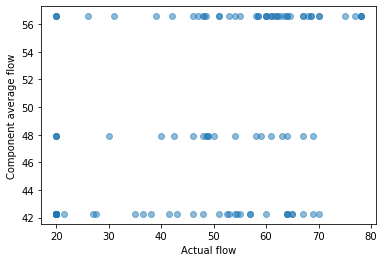

In [43]:
# the plot tells us that one component has relatively small flow values between 20 and 60 

import matplotlib.pyplot as plt

_ = plt.scatter(concrete[["FLOW(cm)"]], 
                avgs[["FLOW(cm)"]].values[concrete.component],
                alpha=0.5) #semi transparent 
_ = plt.xlabel("Actual flow") # picks out average flow 
_ = plt.ylabel("Component average flow")
_ = plt.show()

In [47]:
# how well do we describe this?  lets get our RMSE 
# root mean squared error 
# distance from predicted and actual and calculating error average 
# if values are between 42 and 48, its a large error 

import numpy as np

rmse = np.sqrt(np.mean((concrete[["FLOW(cm)"]] - avgs[["FLOW(cm)"]].values[concrete.component])**2))
rmse

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


FLOW(cm)    16.247477
dtype: float64